<a href="https://colab.research.google.com/github/isharaju/NLP_author_identification/blob/main/author_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes
1. We noticed that taking random sample of sentences gave bad results. The results were better when the whole text was used - maybe because that helped capture the style better

# Things to do:
1. Replace new lines with space 
2. What to do with words like Gemme?
3. Unknown [possible:words treatment?]
4. Change matric accuracy with F1 Prec-Recall and perplexity
5. Handling sentences with --: you are come at last--how I have longed for you!  Sit by me--do not leave me--never leave me again, Sandy, never again. Where is your hand --give it me, dear
6. Program to delete any author name left in the corpus
7. Getting rid of numbers and square brackets: eg. ACD-> Study in scarlet: “looking for lodgings.” [3] i answered.
8. Delete Gutenberg lines from ACD and MT
9. Checking for overfitting by comparing training and test loss

# Code to be added

df.sample(n=3, random_state=1)


In [107]:
# loading the libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import collections 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from io import BytesIO
import requests, base64
import codecs

import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from datetime import datetime

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
# mounting the directory
from google.colab import drive
# commented as it is mounted now
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
def read_file(path):
  with open(path, "r") as input:
      document_collection = input.read().split("\n")
  return document_collection

def split(doc):
    pattern = r'[A-Za-z0-9]+'
    stop_words = set(stopwords.words('english'))
    tokens = nltk.regexp_tokenize(doc, pattern)
    filtered_sentence = [w for w in tokens if not w in stop_words]   
    return filtered_sentence

def doc_vocab(filestream):
    file = filestream
    
    collection = []
    lexicon_count = {}
    index = -1

    for doc in file:
        doc=doc.lower().rstrip()
        collection.append(doc)
        tokens = split(doc)
        
        for word in tokens:
            if lexicon_count.get(word, -1) ==-1:
                lexicon_count[word] =1
            else:
                lexicon_count[word] +=1
                
    return lexicon_count, collection



# creating a parent function
def book_to_corpus(path, author, author_num, genre):
  # reading the file and storing into collection
  document_collection = read_file(path)

  # creating a document vocab
  vocab, coll = doc_vocab(document_collection)
  vocab = {k: v for k, v in sorted(vocab.items(), key=lambda item: item[1], reverse=True)}
  
  # filtering coll
  result = []
  for c in coll:
    if len(c) > 30:
      result.append(c)

  # creting a dataframe
  words = list(vocab.keys())
  freqs = list(vocab.values())
  
  # using the 2 lists we can create a df
  # this one is used to create word cloud and only vocab is used and
  # not the whole collection
  df_cloud = pd.DataFrame(
    {
        'Author': author,
     'Author Number': author_num,
     'Genre': genre,
        'word': words,
     'frequency': freqs
    })
  
  # now we are creating a seperate one
  # to create a df for storing collection
  df = pd.DataFrame(
    {
        'Author': author,
     'Author Number': author_num,
     'Genre': genre,
        'Sentence': result
    })
  

  visualize_word_freq(document_collection, vocab, author_num)
  print(df.head())
  return df


# helper function to encode png to base64 
# to use it for word cloud with
# custom shape
def encode_image(image_url):
    buffered = BytesIO(requests.get(image_url).content)
    image_base64 = base64.b64encode(buffered.getvalue())
    return image_base64


def visualize_word_freq(document_collection, vocab, author_index):
  lexicon_count, collection = doc_vocab(document_collection)
  top = collections.Counter(lexicon_count).most_common()
  x_list = []
  y_list = []
  for i in range(len(top)):
      x_list.append(top[i][0])
      y_list.append(top[i][1])
  d = {"word": x_list, "frequency":y_list}
  d1 = pd.DataFrame(d)
  print(d1.head())

  # bar plot to show most frequent words from the corpus
  plt.figure(figsize=(15,10))
  sns.set_theme(style="whitegrid")
  ax = sns.barplot(x="word", y="frequency", data=d1[:20],palette="Blues_d")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=270, ha="right")


  # builiding the word cloud from the vocab
  plt.figure(figsize=(10,5))
  wordcloud = WordCloud()
  wordcloud.generate_from_frequencies(frequencies=vocab)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()


  # # based on author we will change our cloud shape
  # if author_index == 1:
  #   image_url = "https://raw.githubusercontent.com/isharaju/NLP_author_identification/main/image/sherlock%20holmes.png"
  # elif author_index == 2:
  #   image_url = "https://raw.githubusercontent.com/isharaju/NLP_author_identification/main/image/tiger.png" 
  # elif author_index == 3:
  #   image_url = "https://raw.githubusercontent.com/isharaju/NLP_author_identification/main/image/mark_twain.png"
  # else:
  #   image_url = "https://raw.githubusercontent.com/isharaju/NLP_author_identification/main/image/virginia%20wolf.png"
  # my_img = encode_image(image_url)
  # f3 = open("my_image_cloud.png", "wb")
  # f3.write(codecs.decode(my_img,'base64'))
  # f3.close()
  # img3 = imread("my_image_cloud.png")
  # hcmask3 = img3;
  # # The wordcloud of Cthulhu/squidy thing for HP Lovecraft
  # plt.figure(figsize=(16,13))
  # wc = WordCloud(background_color="black", max_words=10000, 
  #               mask=hcmask3, max_font_size= 40)
  # wc.generate(" ".join(vocab))
  # ## plt.title("HP Lovecraft (Cthulhu-Squidy)", fontsize=20)
  # ## plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
  # plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
  # plt.axis('off')

    word  frequency
0   said        207
1   upon        198
2    one        162
3    man        155
4  would        123


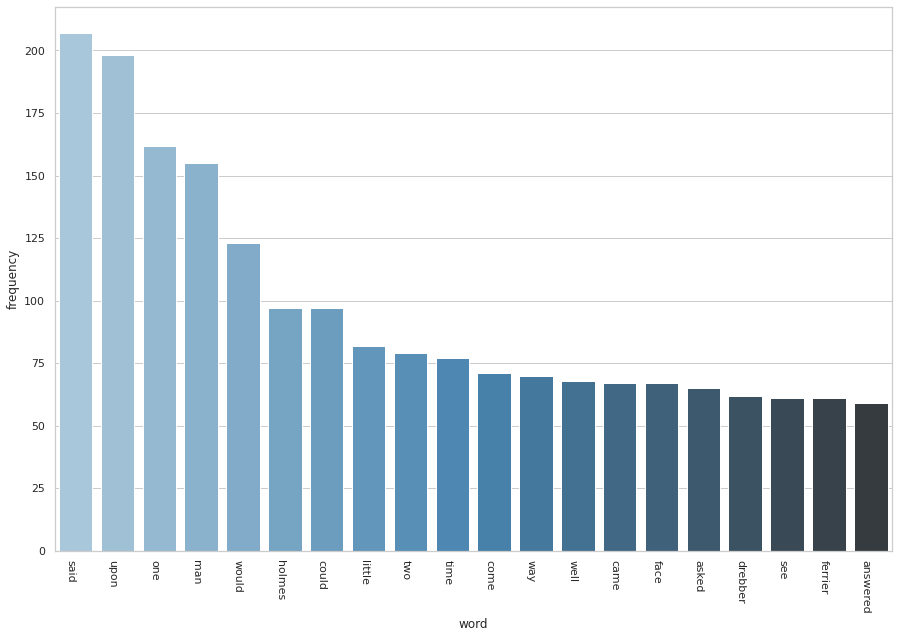

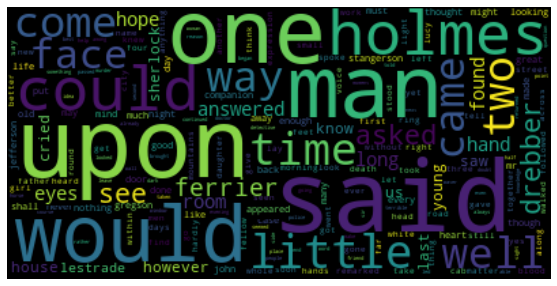

               Author  ...                                           Sentence
0  Arthur Conan Doyle  ...                    chapter i. mr. sherlock holmes.
1  Arthur Conan Doyle  ...  in the year 1878 i took my degree of doctor of...
2  Arthur Conan Doyle  ...  university of london, and proceeded to netley ...
3  Arthur Conan Doyle  ...  prescribed for surgeons in the army. having co...
4  Arthur Conan Doyle  ...  i was duly attached to the fifth northumberlan...

[5 rows x 4 columns]
     word  frequency
0    said        486
1    upon        465
2  holmes        461
3     one        376
4   would        327


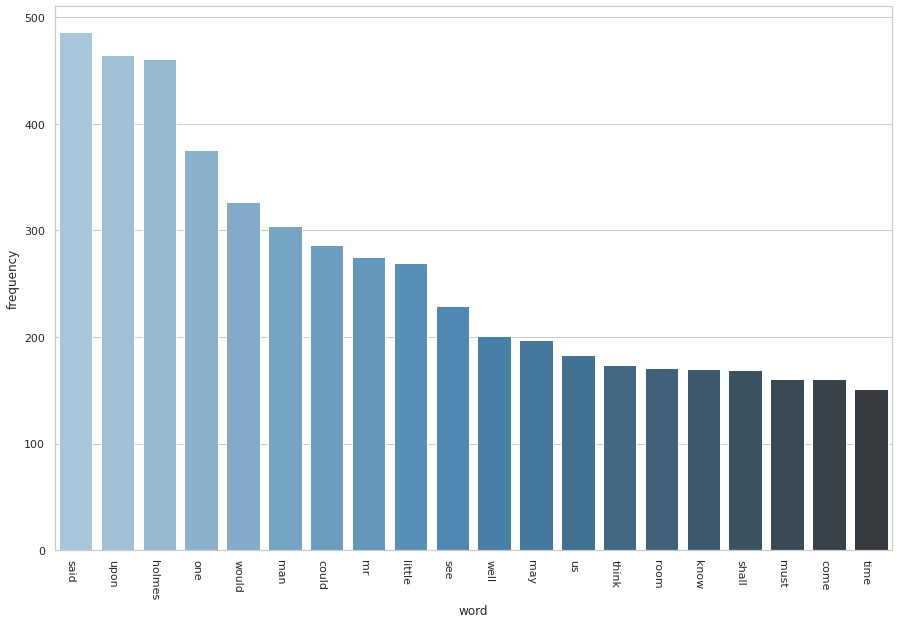

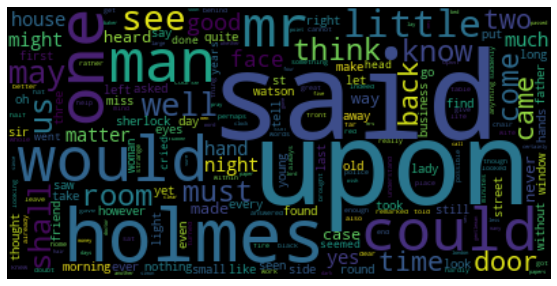

               Author  ...                                           Sentence
0  Arthur Conan Doyle  ...  to sherlock holmes she is always _the_ woman. ...
1  Arthur Conan Doyle  ...  mention her under any other name. in his eyes ...
2  Arthur Conan Doyle  ...  predominates the whole of her sex. it was not ...
3  Arthur Conan Doyle  ...  akin to love for irene adler. all emotions, an...
4  Arthur Conan Doyle  ...  were abhorrent to his cold, precise but admira...

[5 rows x 4 columns]
   word  frequency
0   sir        350
1  upon        314
2   one        247
3  said        240
4   man        213


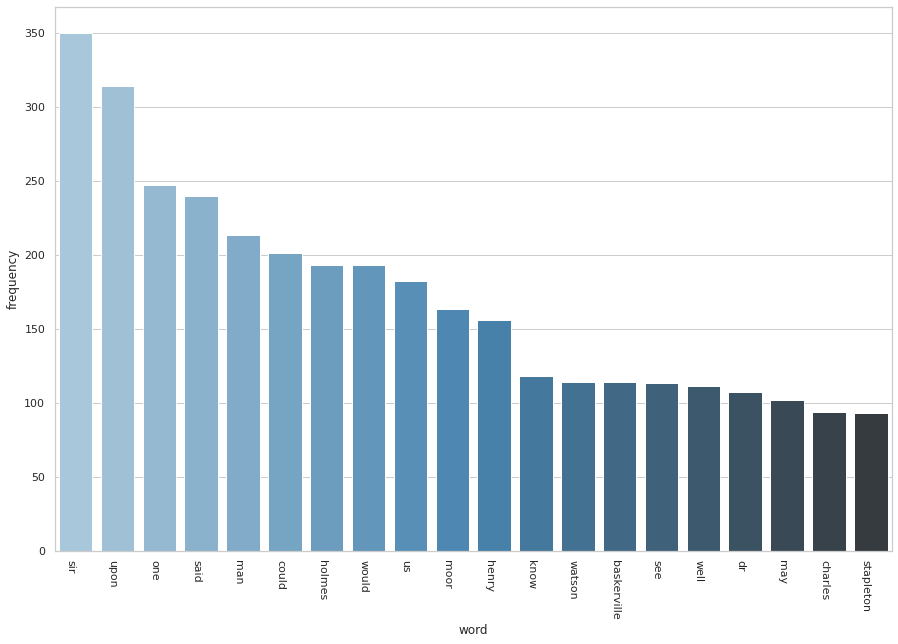

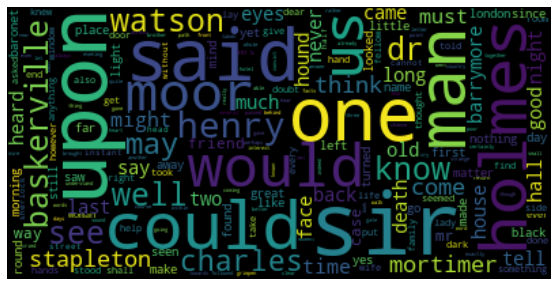

               Author  ...                                           Sentence
0  Arthur Conan Doyle  ...        mr. sherlock holmes, who was usually ver...
1  Arthur Conan Doyle  ...        save upon those not infrequent occasions...
2  Arthur Conan Doyle  ...        night, was seated at the breakfast table...
3  Arthur Conan Doyle  ...        hearth-rug and picked up the stick which...
4  Arthur Conan Doyle  ...        behind him the night before. it was a fi...

[5 rows x 4 columns]
    word  frequency
0   upon        411
1     us        333
2    one        301
3   said        297
4  could        291


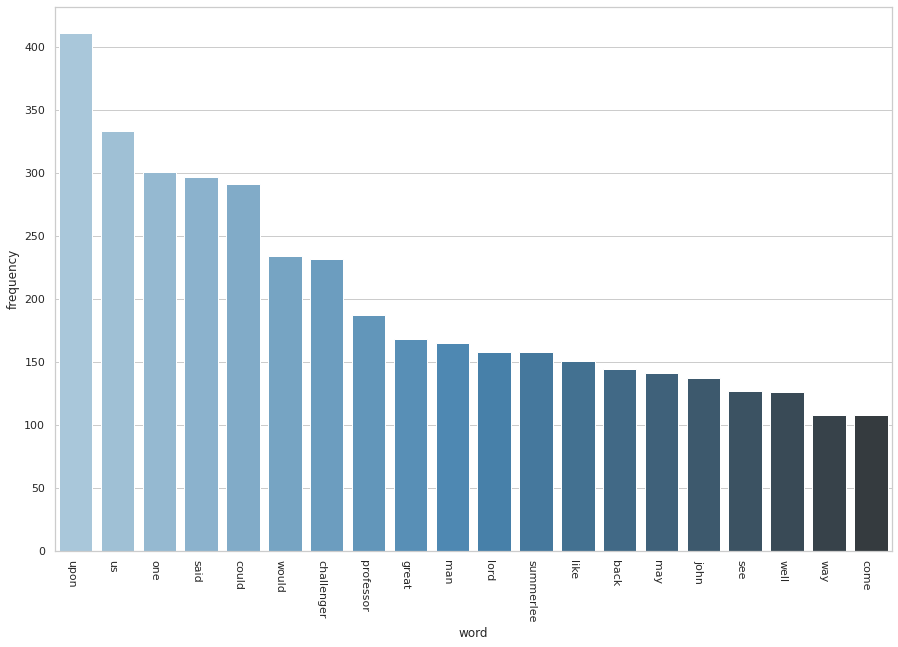

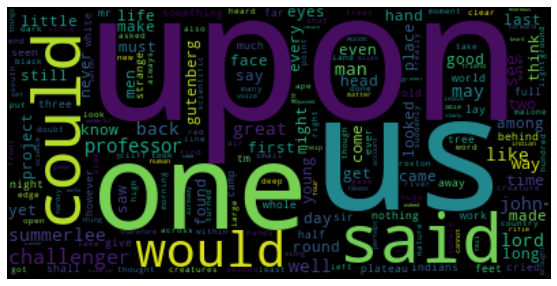

               Author  ...                                           Sentence
0  Arthur Conan Doyle  ...                                     the lost world
1  Arthur Conan Doyle  ...                                          chapter i
2  Arthur Conan Doyle  ...                  "there are heroisms all round us"
3  Arthur Conan Doyle  ...  mr. hungerton, her father, really was the most...
4  Arthur Conan Doyle  ...  earth,--a fluffy, feathery, untidy cockatoo of...

[5 rows x 4 columns]
      word  frequency
0  leopard        429
1      man        283
2      one        243
3    would        224
4    eater        173


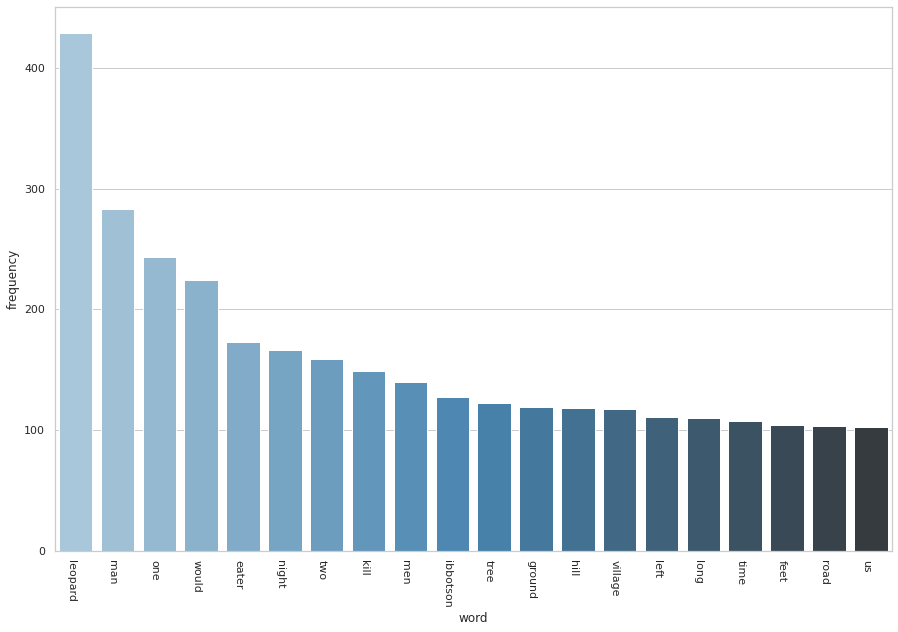

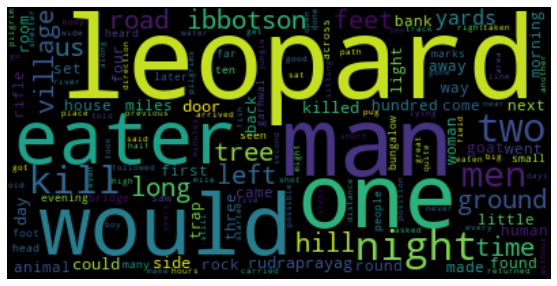

        Author  ...                                           Sentence
0  Jim Corbett  ...  if you are a hindu from the sun-scorched plain...
1  Jim Corbett  ...  and you desire— as all good hindus do— to perf...
2  Jim Corbett  ...  pilgrimage to the age-old shrines of kedarnath...
3  Jim Corbett  ...  you must start on your pilgrimage from hardwar...
4  Jim Corbett  ...  to acquire a full measure of the merits vouch-...

[5 rows x 4 columns]
      word  frequency
0    tiger        422
1      man        330
2      one        322
3    would        322
4  tigress        272


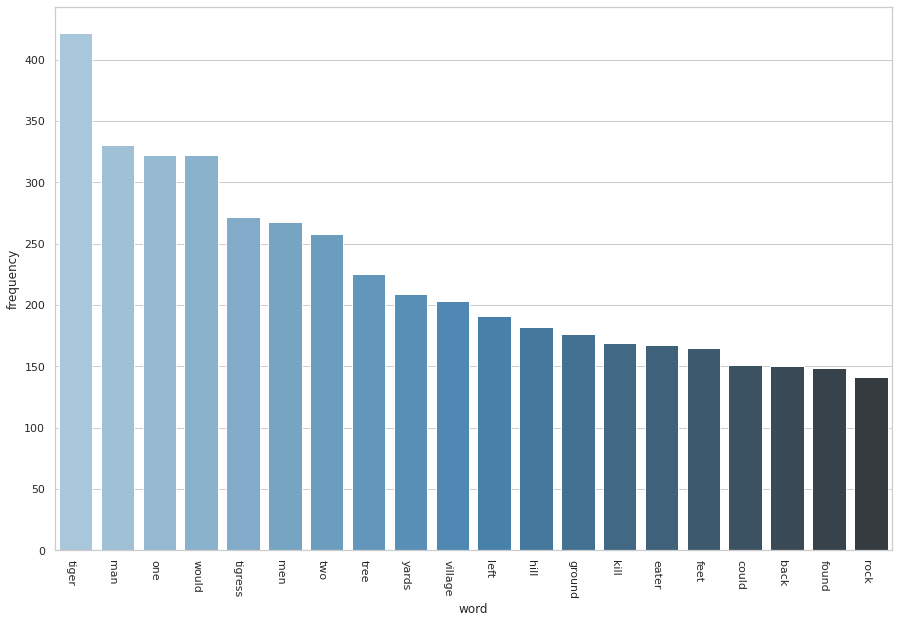

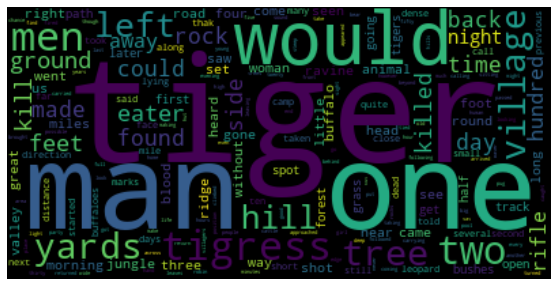

        Author  ...                                           Sentence
0  Jim Corbett  ...  i was shooting with eddie knowles in malani wh...
1  Jim Corbett  ...  heard of the tiger which later received offici...
2  Jim Corbett  ...  eddie, who will long be remembered in this pro...
3  Jim Corbett  ...  sportsman par excellence and the possessor of ...
4  Jim Corbett  ...  fund of shikar yarns, was one of those few, an...

[5 rows x 4 columns]
    word  frequency
0    one        242
1  would        206
2    two        185
3    men        169
4    man        154


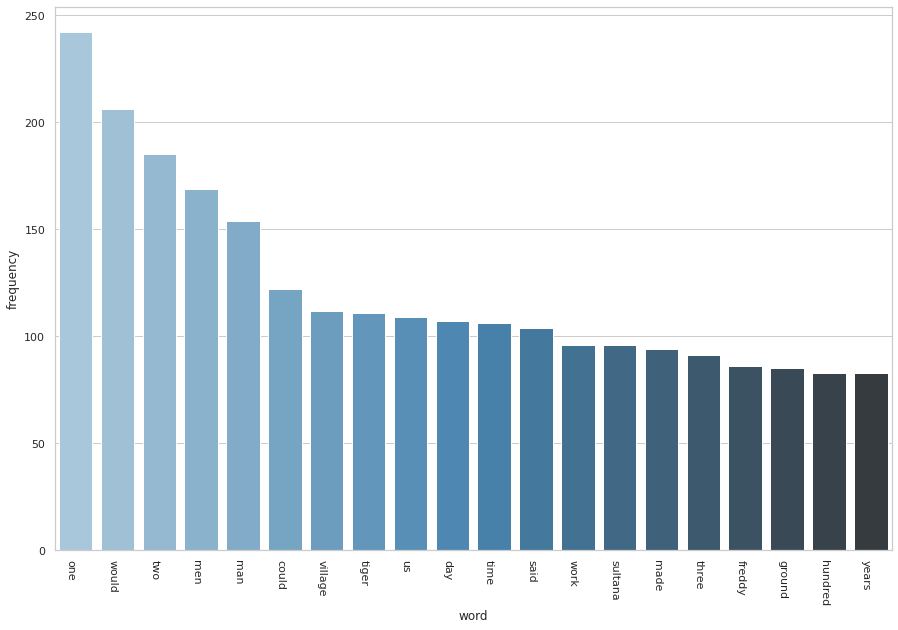

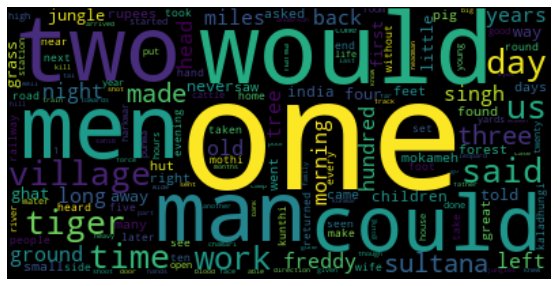

        Author  ...                                           Sentence
0  Jim Corbett  ...  having read my dedication you may ask: 'who ar...
1  Jim Corbett  ...  of india that you mention?' 'what do you mean ...
2  Jim Corbett  ...  the questions are justified. the world has dev...
3  Jim Corbett  ...  of using the word 'indian' to denote an inhabi...
4  Jim Corbett  ...  peninsula that stretches upwards of two thousa...

[5 rows x 4 columns]
    word  frequency
0  tiger        428
1  would        264
2    man        256
3    men        231
4    one        226


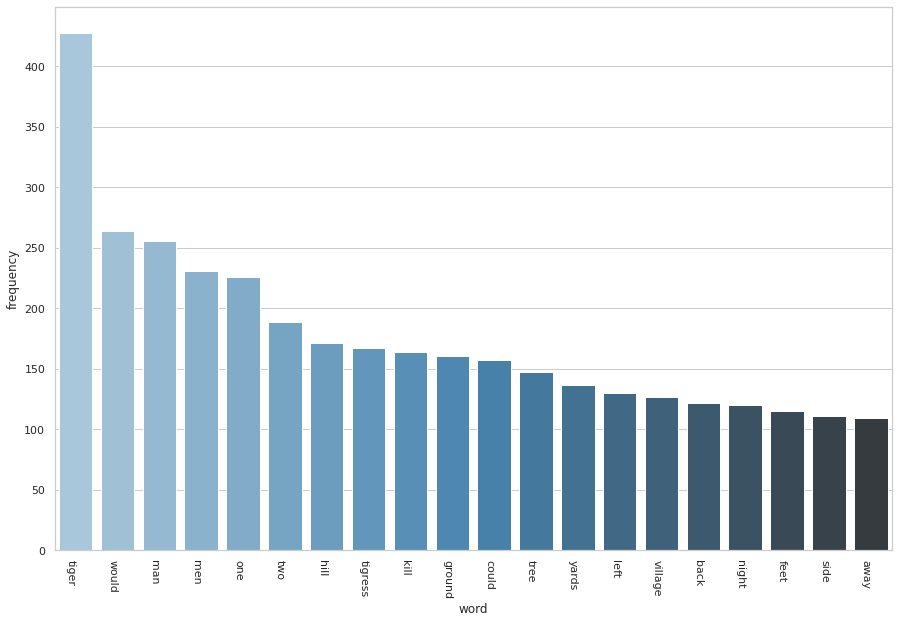

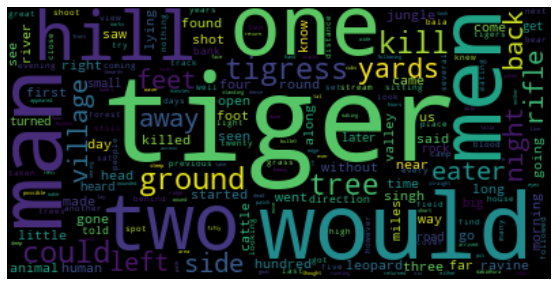

        Author  ...                                           Sentence
0  Jim Corbett  ...  it is not possible for those who have never li...
1  Jim Corbett  ...  upper reaches of the himalayas to have any con...
2  Jim Corbett  ...  stranglehold that superstition has on the peop...
3  Jim Corbett  ...  that sparsely populated region. the dividing l...
4  Jim Corbett  ...  superstitions of simple uneducated people who ...

[5 rows x 4 columns]
        word  frequency
0   princess         40
1       tree         35
2  elephants         26
3     forest         23
4       salt         21


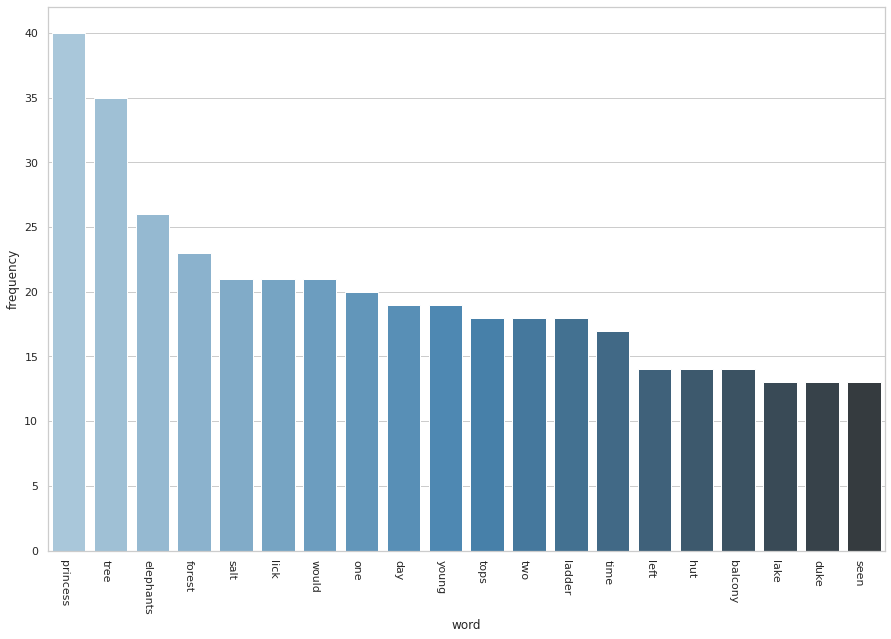

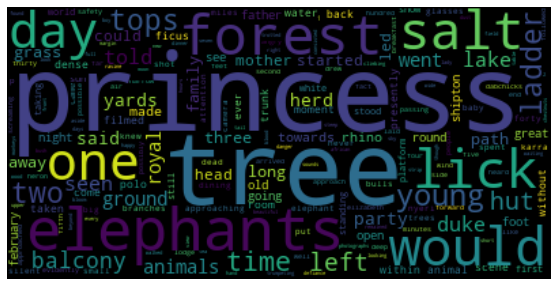

        Author  ...                                           Sentence
0  Jim Corbett  ...  a brilliant sun was shining in a deep blue sky...
1  Jim Corbett  ...  was crisp and invigorating, on that fifth day ...
2  Jim Corbett  ...  i was standing on a wooden platform, thirty fe...
3  Jim Corbett  ...  and before me stretched an oval-shaped clearin...
4  Jim Corbett  ...  two hundred yards long and a hundred yards wid...

[5 rows x 4 columns]
    word  frequency
0  would        541
1    one        465
2   said        404
3  could        381
4   king        371


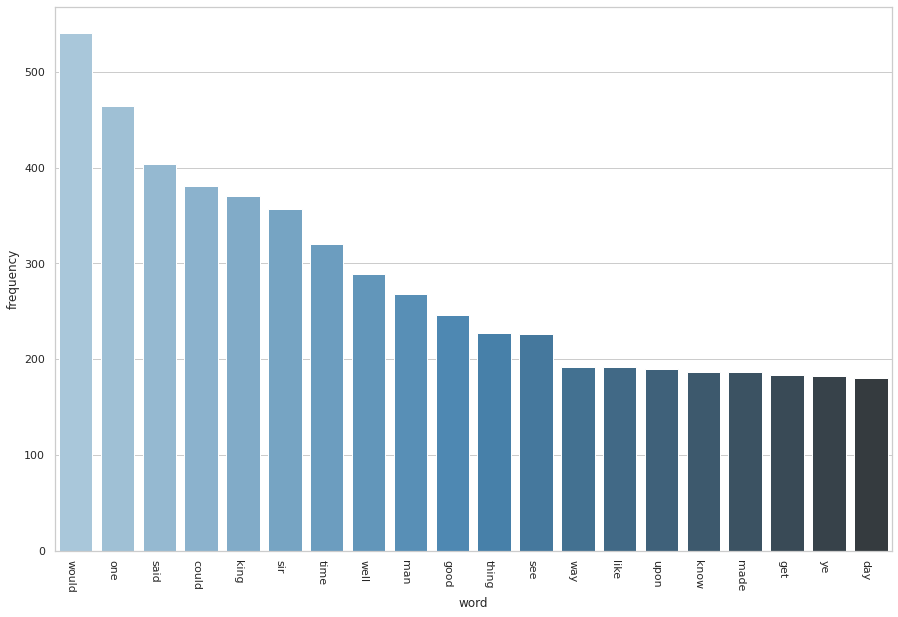

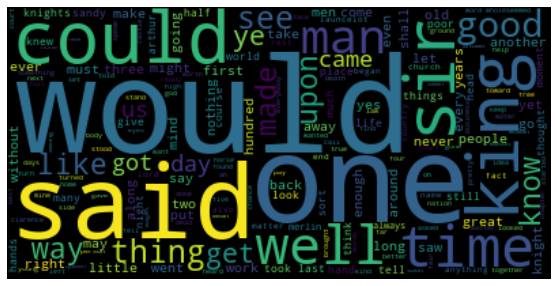

        Author  ...                                           Sentence
0  Jim Corbett  ...        a connecticut yankee in king arthur's court
1  Jim Corbett  ...  it was in warwick castle that i came across th...
2  Jim Corbett  ...  whom i am going to talk about.  he attracted m...
3  Jim Corbett  ...  his candid simplicity, his marvelous familiari...
4  Jim Corbett  ...  and the restfulness of his company--for he did...

[5 rows x 4 columns]
   word  frequency
0  says        637
1   got        623
2  said        491
3   see        477
4  well        417


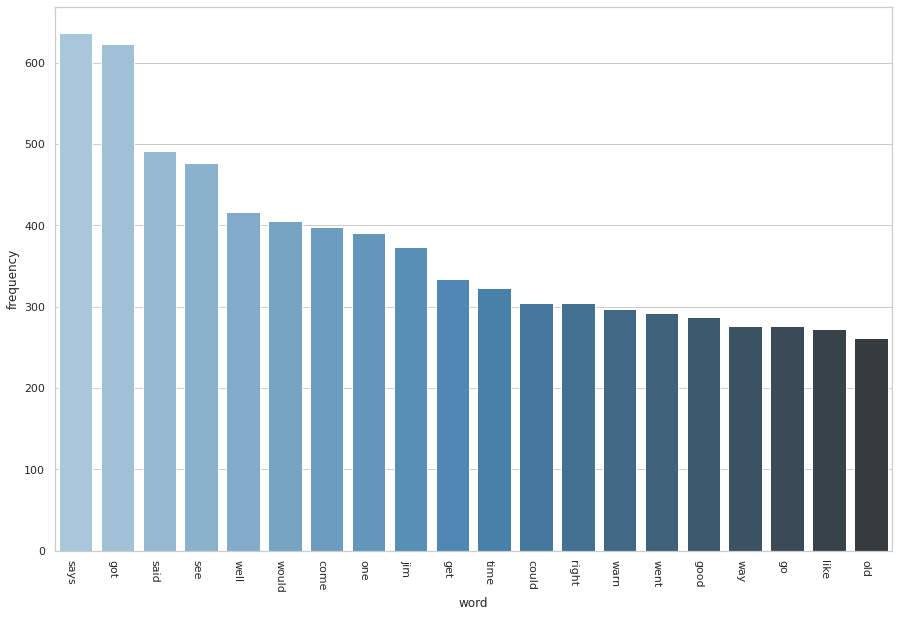

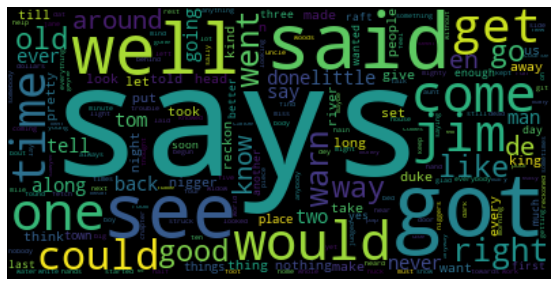

       Author  ...                                           Sentence
0  Mark Twain  ...  you don't know about me without you have read ...
1  Mark Twain  ...  adventures of tom sawyer; but that ain't no ma...
2  Mark Twain  ...  by mr. mark twain, and he told the truth, main...
3  Mark Twain  ...  which he stretched, but mainly he told the tru...
4  Mark Twain  ...  never seen anybody but lied one time or anothe...

[5 rows x 4 columns]
    word  frequency
0    tom        773
1   said        356
2   huck        249
3  would        241
4   time        189


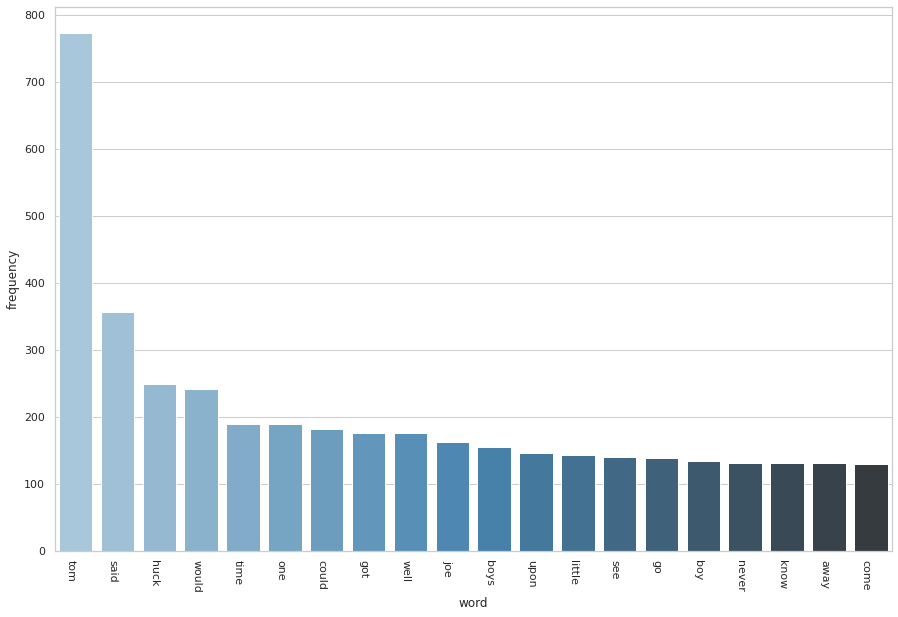

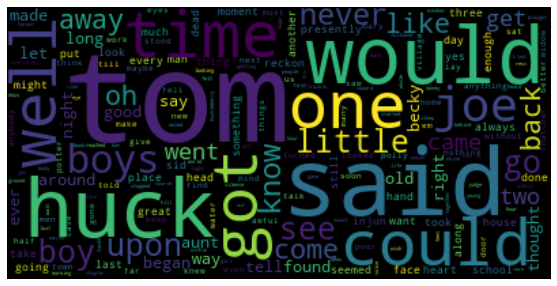

       Author  ...                                           Sentence
0  Mark Twain  ...   “what's gone with that boy,  i wonder? you tom!”
1  Mark Twain  ...  the old lady pulled her spectacles down and lo...
2  Mark Twain  ...  room; then she put them up and looked out unde...
3  Mark Twain  ...  never looked _through_ them for so small a thi...
4  Mark Twain  ...  her state pair, the pride of her heart, and we...

[5 rows x 4 columns]
    word  frequency
0    one        908
1  would        484
2     us        462
3   upon        449
4  could        443


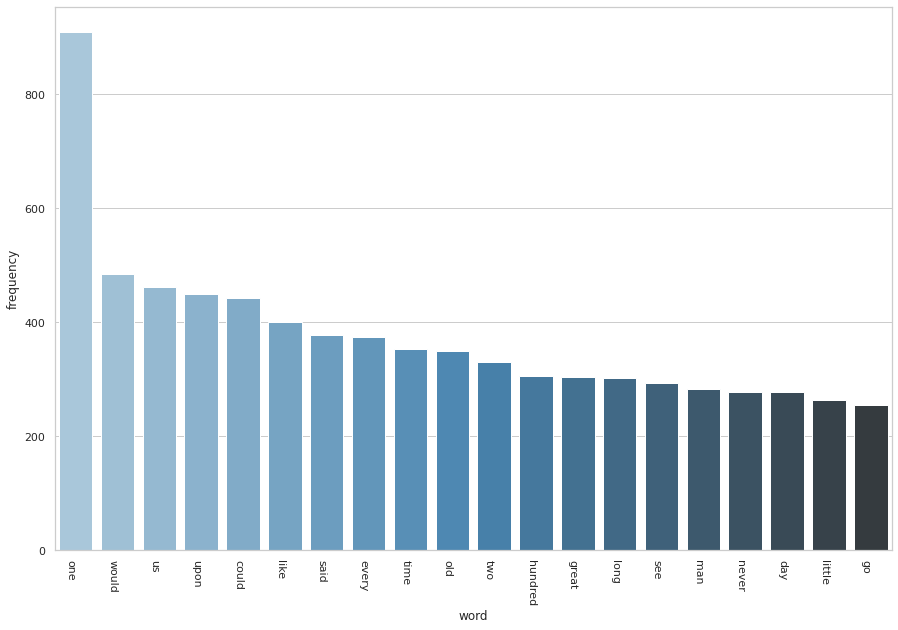

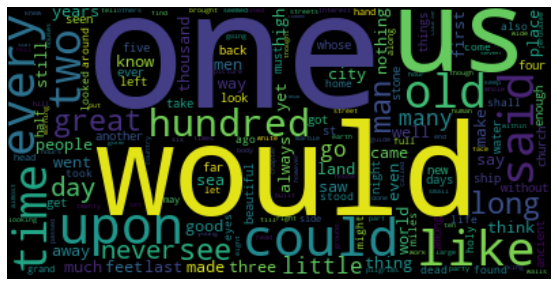

       Author  ...                                           Sentence
0  Mark Twain  ...  for months the great pleasure excursion to eur...
1  Mark Twain  ...  chatted about in the newspapers everywhere in ...
2  Mark Twain  ...  countless firesides.  it was a novelty in the ...
3  Mark Twain  ...  had not been thought of before, and it compell...
4  Mark Twain  ...  attractive novelties always command.  it was t...

[5 rows x 4 columns]
   word  frequency
0  king        447
1  thou        288
2  said        272
3  upon        271
4   tom        251


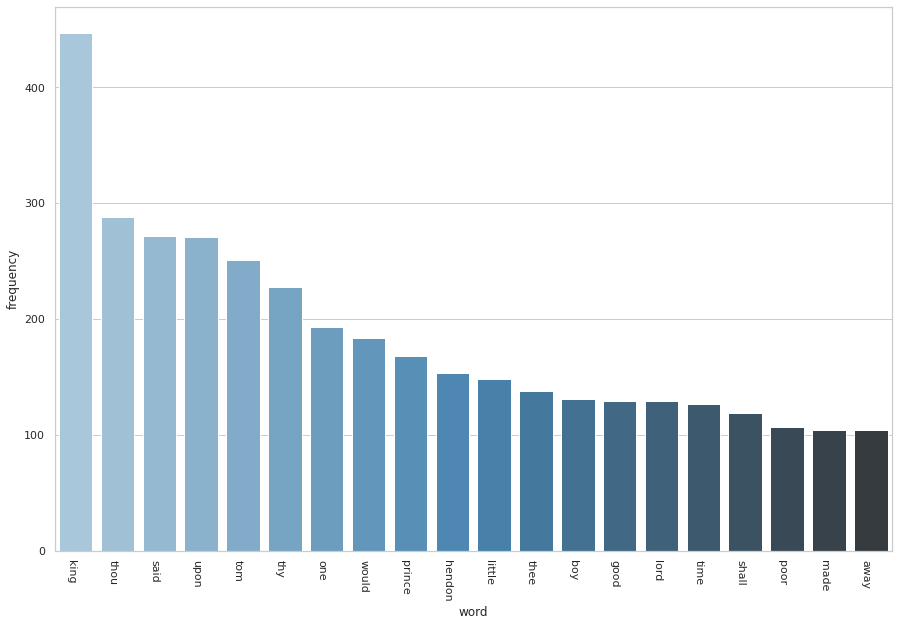

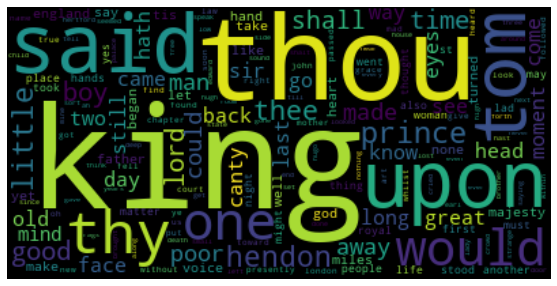

       Author  ...                                           Sentence
0  Mark Twain  ...  chapter i. the birth of the prince and the pau...
1  Mark Twain  ...  in the ancient city of london, on a certain au...
2  Mark Twain  ...  quarter of the sixteenth century, a boy was bo...
3  Mark Twain  ...  name of canty, who did not want him.  on the s...
4  Mark Twain  ...  child was born to a rich family of the name of...

[5 rows x 4 columns]
    word  frequency
0   said        425
1  jacob        393
2    one        291
3    mrs        231
4   like        166


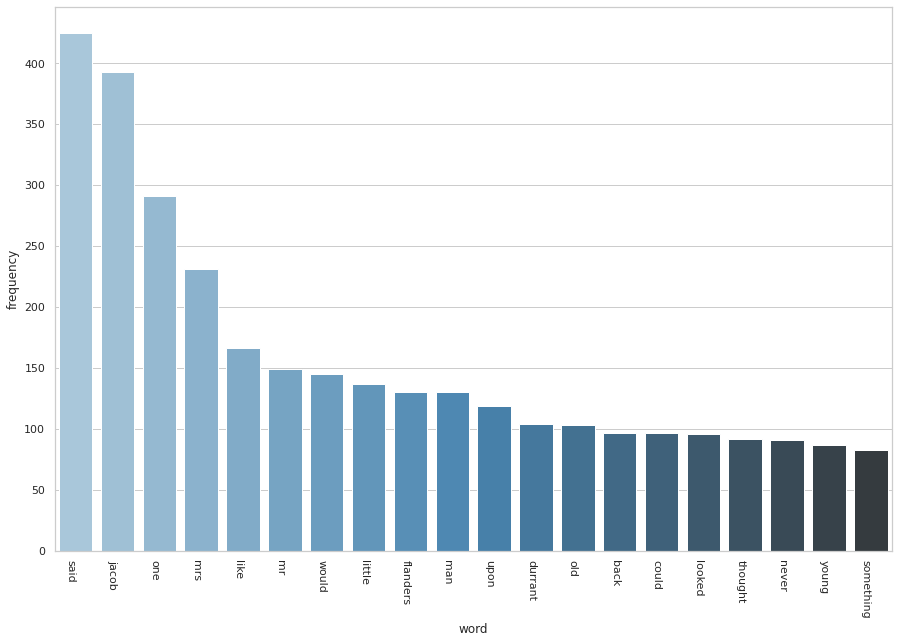

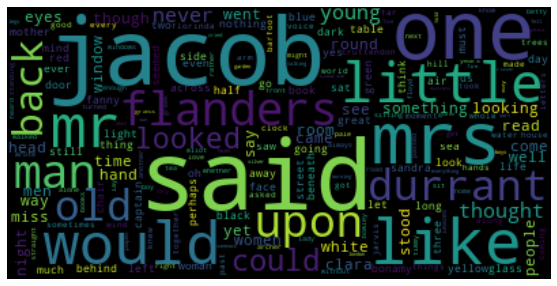

       Author  ...                                           Sentence
0  Mark Twain  ...  "so of course," wrote betty flanders, pressing...
1  Mark Twain  ...  in the sand, "there was nothing for it but to ...
2  Mark Twain  ...  slowly welling from the point of her gold nib,...
3  Mark Twain  ...  the full stop; for there her pen stuck; her ey...
4  Mark Twain  ...  filled them. the entire bay quivered; the ligh...

[5 rows x 4 columns]
   word  frequency
0   one        107
1  said         58
2  like         49
3    us         44
4  upon         39


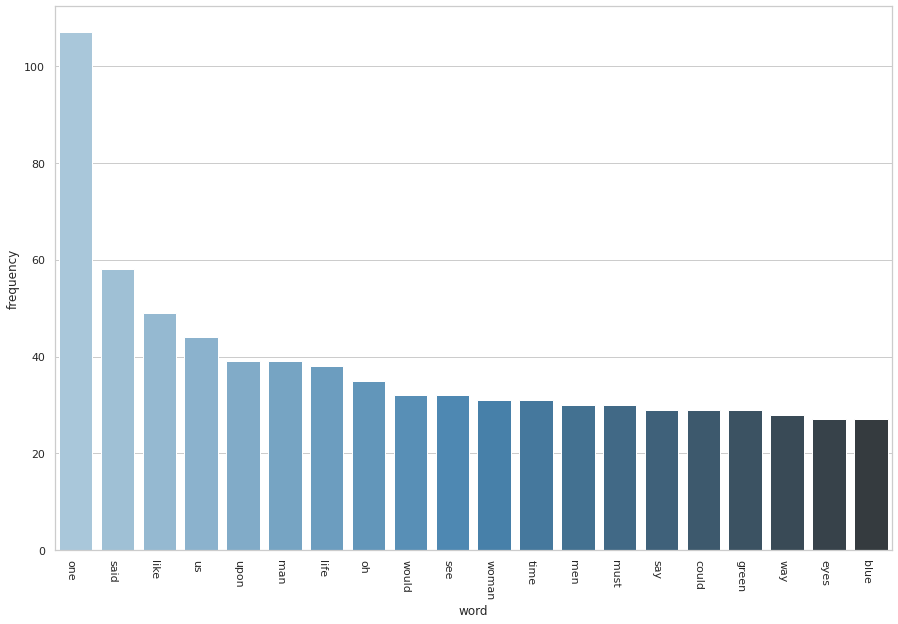

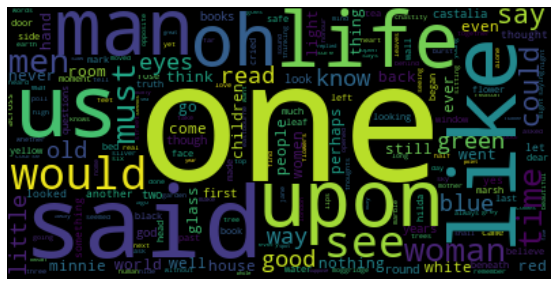

           Author  ...                                           Sentence
0  Virginia Woolf  ...  whatever hour you woke there was a door shutti...
1  Virginia Woolf  ...  went, hand in hand, lifting here, opening ther...
2  Virginia Woolf  ...  "here we left it," she said. and he added, "oh...
3  Virginia Woolf  ...  upstairs," she murmured. "and in the garden," ...
4  Virginia Woolf  ...                they said, "or we shall wake them."

[5 rows x 4 columns]
       word  frequency
0  clarissa         42
1   thought         36
2      said         33
3       one         22
4     would         17


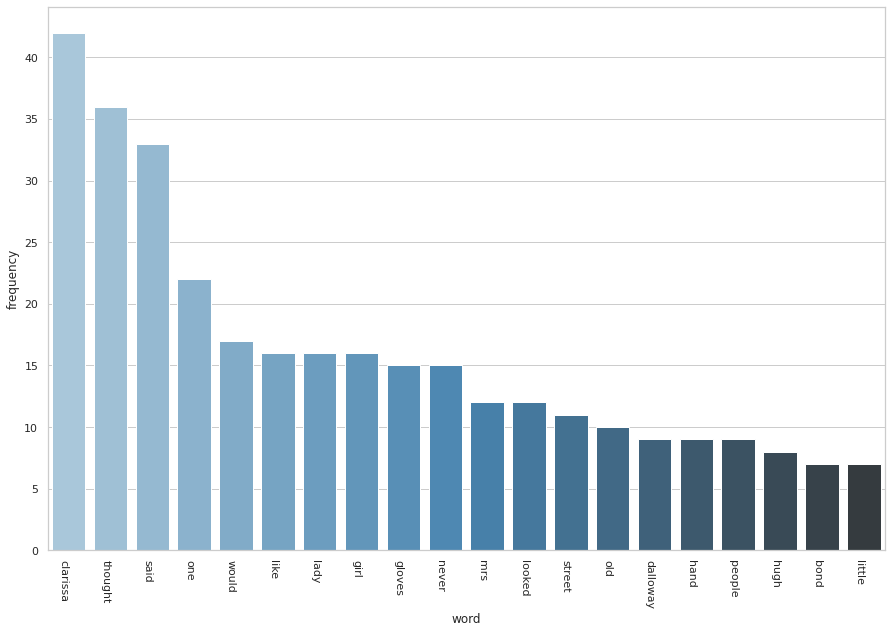

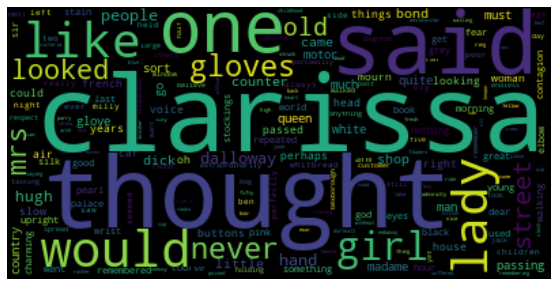

           Author  ...                                           Sentence
0  Virginia Woolf  ...  mrs dalloway said she would buy the gloves her...
1  Virginia Woolf  ...  big ben was striking as she stepped out into t...
2  Virginia Woolf  ...  o'clock and the unused hour was fresh as if is...
3  Virginia Woolf  ...  beach. but there was something solemn in the d...
4  Virginia Woolf  ...  repeated strokes; something stirring in the mu...

[5 rows x 4 columns]
        word  frequency
0  katharine        483
1        one        429
2       said        352
3       mary        265
4      would        259


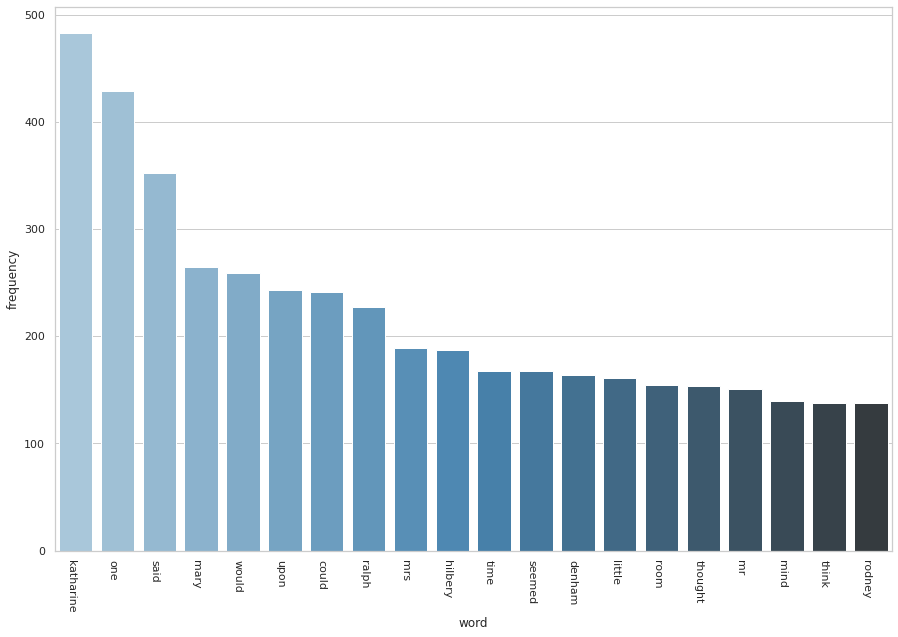

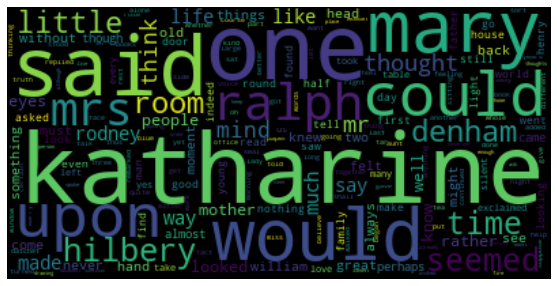

           Author  ...                                           Sentence
0  Virginia Woolf  ...  it was a sunday evening in october, and in com...
1  Virginia Woolf  ...  ladies of her class, katharine hilbery was pou...
2  Virginia Woolf  ...  fifth part of her mind was thus occupied, and ...
3  Virginia Woolf  ...  over the little barrier of day which interpose...
4  Virginia Woolf  ...  and this rather subdued moment, and played wit...

[5 rows x 4 columns]
     word  frequency
0    said        874
1     one        810
2  rachel        585
3     mrs        440
4    like        408


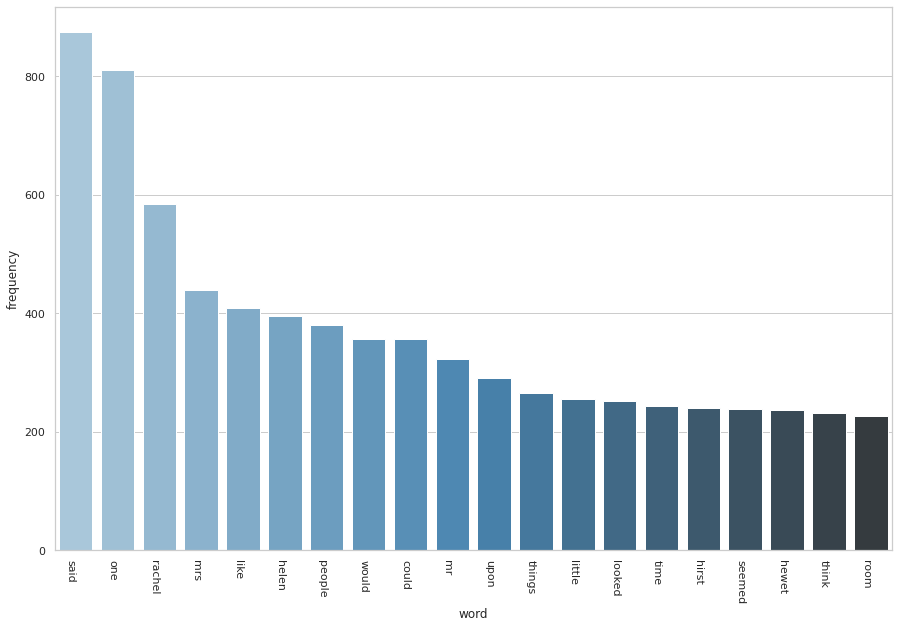

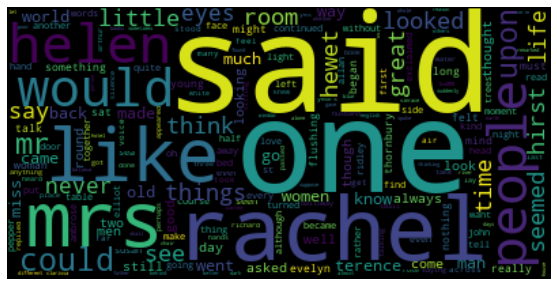

           Author  ...                                           Sentence
0  Virginia Woolf  ...  as the streets that lead from the strand to th...
1  Virginia Woolf  ...  narrow, it is better not to walk down them arm...
2  Virginia Woolf  ...  lawyers' clerks will have to make flying leaps...
3  Virginia Woolf  ...  typists will have to fidget behind you. in the...
4  Virginia Woolf  ...  beauty goes unregarded, eccentricity must pay ...

[5 rows x 4 columns]


In [110]:
# initializing an array to store author names
authors = ["Arthur Conan Doyle", "Jim Corbett", "Mark Twain", "Virginia Woolf"]

# for each author we are selecting 5 books and storing the genres in array
genre = ["crime", "crime", "crime", "science fiction", "wildlife", "wildlife", "travel", "wildlife", "unknown", "children", "children", "children", "children", "children", "non-fiction", "non-fiction", "non-fiction", "non-fiction", "non-fiction"]

# for each file creating a df 
df_list = []

# get all the files from the given directory path
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('/content/drive/MyDrive/NLP_project_112020/') if isfile(join('/content/drive/MyDrive/NLP_project_112020/', f))]
onlyfiles = sorted(onlyfiles)

# calling the book_to_corpus function for each file
for index, file in enumerate(onlyfiles):
  # for assiginng author to the file (every 5 books will have same author)
  if index < 4:
    a_i = 0
  elif index < 10:
    a_i = 1
  elif index < 15:
    a_i = 2
  else:
    a_i = 3

  # storing the dataframe from the function into the list
  df_list.append(book_to_corpus("/content/drive/MyDrive/NLP_project_112020/{}".format(file), authors[a_i], a_i+1, genre[index]))

# Pre processing

In [111]:
# let's see the dimension of each dataframe
all_books = pd.DataFrame(columns= ["Author","Author Number", "Genre", "Sentence"])
all_books = all_books.fillna(0)
for df in df_list:
  all_books = pd.concat([all_books, df], ignore_index=True)
all_books.shape
all_books = all_books.drop_duplicates(keep=False)

# after merging we will take 15k sentences from each author
# taking 15K random samples
# df.sample(n=10000, random_state=1)
acd = all_books[all_books.Author == "Arthur Conan Doyle"]
jc = all_books[all_books.Author == "Jim Corbett"]
mt = all_books[all_books.Author == "Mark Twain"]
vw = all_books[all_books.Author == "Virginia Woolf"]

# merging the aboce dfs
all_books = pd.concat([acd, jc, mt, vw], ignore_index=True)
all_books.shape

(114607, 4)

['Arthur Conan Doyle' 'Jim Corbett' 'Mark Twain' 'Virginia Woolf']


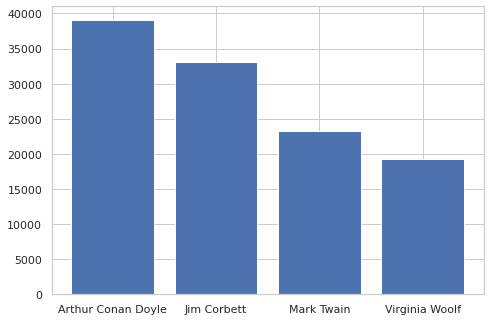

In [112]:
import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
#import plotly.tools as tls

x = all_books.Author.unique()
print(x)
y = all_books.Author.value_counts().values
           
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show() 

## Train Test Split

In [113]:
# function to split data
def split_data(all_data, all_labels, split_point):
    train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size=1-split_point)

    return train_data, test_data, train_labels, test_labels

In [114]:
# calling the split function
all_data = all_books["Sentence"]
print(len(all_data))
all_labels = all_books['Author']
print(len(all_labels))
train_data, test_data, train_labels, test_labels = split_data(all_data, all_labels, 0.8)

114607
114607


In [115]:
# length of train and test
print(len(train_data), len(test_data), len(train_labels), len(test_labels))
print(train_data.shape, test_data.shape, train_labels.shape)

91685 22922 91685 22922
(91685,) (22922,) (91685,)


# Naive Bayes Model

In [116]:
def nb():
    # fit the model using the training data and then predict the targets/labels of test data
    model = make_pipeline(TfidfVectorizer(), MultinomialNB())
    model.fit(train_data, train_labels)
    labels = model.predict(test_data)
    return labels
pred_labels = nb()

In [117]:
labs, counts = np.unique(pred_labels, return_counts=True)

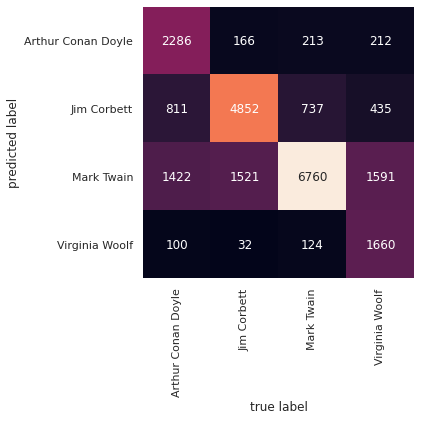

In [118]:
# Generate and display the confusion matrix of your model as a heatmap plot. 
def plot_mat(test_labels, predicted_labels, labs):
    mat = confusion_matrix(test_labels, predicted_labels)
    plt.figure(figsize=(5,5))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
                xticklabels=labs, yticklabels=labs)
    plt.xlabel('true label')
    plt.ylabel('predicted label')

plot_mat(test_labels, pred_labels, labs)

In [119]:
from sklearn.metrics import f1_score
micro_f1 = f1_score(test_labels, pred_labels, labels=None, pos_label=1, average='micro')
macro_f1 = f1_score(test_labels, pred_labels, labels=None, pos_label=1, average='macro')

print(micro_f1)
print(macro_f1)

0.6787365849402321
0.6529082366983097


# MLPClassifier

In [120]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier

In [121]:
# function to hyper tune parameters for MLP model
def MLP(architecture):
  start_time = datetime.now()
  model2 = make_pipeline(TfidfVectorizer(), 
  MLPClassifier(hidden_layer_sizes=architecture, 
                                      random_state=1, 
                                      learning_rate="adaptive",
                                      verbose = True))

  model2.fit(train_data, train_labels)
  model2.predict_proba(test_data)
  pred_labels2 = model2.predict(test_data)
  pred_labels2
  model2.score(test_data, test_labels)
  mat2 = confusion_matrix(test_labels, pred_labels2)
  plt.figure(figsize=(5,5))
  sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False, 
                  xticklabels=["Arthur Conan Doyle", "Jim Corbett", "Mark Twain", "Virginia Woolf"], 
                  yticklabels=["Arthur Conan Doyle", "Jim Corbett", "Mark Twain", "Virginia Woolf"])
  plt.xlabel('true label')
  plt.ylabel('predicted label');
  micro2 = f1_score(test_labels, pred_labels2, average='micro')
  macro2 = f1_score(test_labels, pred_labels2, average='macro')
  print("_______________________________________________")
  print("microaveraged F1 scores for model 2 : ",micro2)
  print("macroaveraged F1 scores for model 2 : ",macro2)
  print("_______________________________________________")
  end_time = datetime.now()
  print('Duration: {}'.format(end_time - start_time))

In [ ]:
# Model 2 with 4 hidden layers, each with 50 hidden units and learning_rate = "adaptive"
MLP(architecture=(50,50,50,50))

Iteration 1, loss = 0.92647080
Iteration 2, loss = 0.57961680
Iteration 3, loss = 0.45072880
Iteration 4, loss = 0.36287666
Iteration 5, loss = 0.28157373
Iteration 6, loss = 0.20617530


In [ ]:
MLP(architecture=(50,50,50,50,50,50))